<a href="https://colab.research.google.com/github/bansalsahab/MLSA/blob/main/Q2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('data.csv')
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [8]:
# Group passengers by passengers class
grouped_by_class = dataset.groupby('Pclass')
mean_age_by_class = grouped_by_class['Age'].mean()
print(mean_age_by_class)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


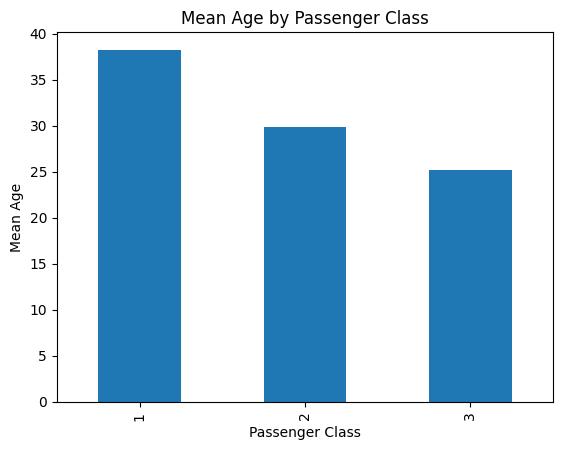

In [9]:
mean_age_by_class.plot(kind='bar')
plt.title('Mean Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Age')
plt.show()


In [10]:
# 1. Passenger Class and Survival Rates
class_survival = dataset.groupby('Pclass')['Survived'].mean()
print("Survival Rates by Passenger Class:")
print(class_survival)


Survival Rates by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [11]:
# 2. Age Distribution and Survival Rates
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Children', 'Young Adults', 'Adults', 'Elderly']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels)
age_survival = dataset.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rates by Age Group:")
print(age_survival)


Survival Rates by Age Group:
AgeGroup
Children        0.503597
Young Adults    0.382682
Adults          0.400000
Elderly         0.227273
Name: Survived, dtype: float64


In [12]:
# 3. Gender and Survival Rates
gender_survival = dataset.groupby('Sex')['Survived'].mean()
print("\nSurvival Rates by Gender:")
print(gender_survival)


Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


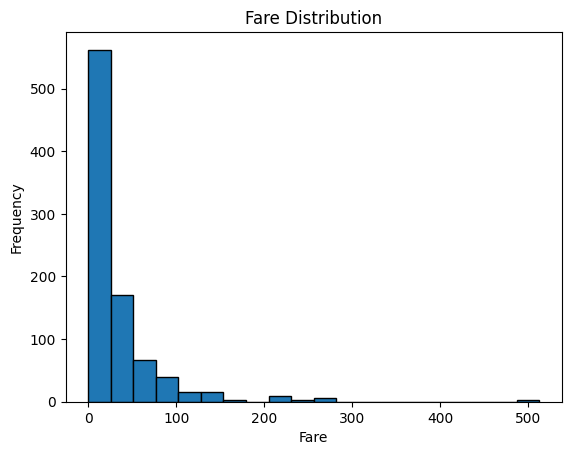

In [13]:
# 4 Fare Distribution
plt.hist(dataset['Fare'], bins=20, edgecolor='k')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 5. Family Size and Survival Rates
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
family_survival = dataset.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rates by Family Size:")
print(family_survival)


Survival Rates by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
